## 无监督学习(Unsupervised Learning)
---

无监督学习(Unsupervised Learning)事实上比起监督学习，区别在于：**没有预测/学习目标（Target）**
这类学习问题往往数据资源更加丰富，因为很大程度上，监督学习(Supervised Learning)经常需要人类来承担标注工作，从而“教会”计算机做预测工作；而且这个工作有时候还需要专业人士参与，比如Iris那种数据库，不是专家（这时候专家还是有用的），一般人是分辨不了的。
* 监督学习有两大基本类型：分类和回归（事实上还有序列化标注等更加复杂的问题)
* 无监督学习有：聚类、降维等问题。

* 监督学习问题，我们需要通过标注的“反馈”来“训练”模型参数；
* 无监督学习问题则更加倾向于寻找数据特征本身之间的“共性”或者叫“模式”。比如：聚类问题，通过寻找数据之间“相似”的特征表达，来发现数据的“群落”。降维/压缩问题则是选取数据具有代表性的特征，在保持数据多样性(variance)的基础上，规避掉大量的特征冗余和噪声，不过这个过程也很有可能会损失一些有用的模式信息。

### 1. 主成分分析（PCA降维）
---
首先我们思考一个小例子，用来解释降低维度，信息冗余和PCA功能的。

比如，我们有一组数据[(1, 2), (2, 4)]，假设这两个数据都反映到一个类别（分类）或者一个类簇（聚类）。但是如果我们的学习模型是线性模型，那么这两个数据其实只能帮助权重参数更新一次，因为他们**线性相关**，所有的特征数值都只是扩张了相同的倍数。如果使用PCA分析的话，这个**矩阵的“秩”是1**，也就是说，在多样性程度上，这个矩阵只有一个自由度。
其实，我们也可以把PCA当做特征选择，只是和普通理解的不同，这种特征选择是首先把**原来的特征空间做了映射**，使得**新的映射后特征空间数据彼此正交。**

下面就让我们进入正题，看看PCA在哪些具体应用上可以使用。
第一个例子便是**手写数字识别**（最终还是应用在监督学习上，不过中间的特征采样过程用到PCA）。

In [2]:
import numpy as np

# 先热个身，小试牛刀
M = np.array([[1,2],[2,4]])

In [3]:
M

array([[1, 2],
       [2, 4]])

In [4]:
# 获取矩阵的秩
np.linalg.matrix_rank(M,tol = None)

1

In [5]:
# 载入手写数字的图像像素数据，对于图像处理冒出了后续的各种启发式提取有效特征以外
# 最直接常用的就是像素数据，每个像素都是一个数值，反映颜色
from sklearn.datasets import load_digits
digits = load_digits()
# 这些经典数据集的存储格式非常统一。这是好习惯，同意了接口，也便于快速使用
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [7]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [9]:
# 老套路
X_digits,y_digits = digits.data,digits.target

In [10]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

#最关键的参数就是n_components = 2个主成分
estimator = PCA(n_components = 2)
X_pca = estimator.fit_transform(X_digits)
# scikit-learn的接口设计的很统一。

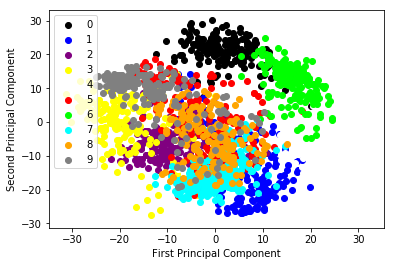

In [12]:
# 聚类问题经常需要直观地展现数据集，降维度的一个直接目的也为此，因此我们这里多展现几个图片直观一些
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits == i]
        py = X_pca[:, 1][y_digits == i]
        plt.scatter(px,py,c=colors[i])
    plt.legend(digits.target_names)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show
%matplotlib inline # jupyter notebook中使用画图需要加上此条命令
plot_pca_scatter()